In [ ]:
#Author Cheolhong Ahn
#CMSC206 Project 5

from textblob import TextBlob
import tweepy
from wordcloud import WordCloud
import PySimpleGUI as sg
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import plotly.express as px

#cleans text for better analysis
def textClean(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r':','', text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'\n', '',text)
  return text

def polarityCat(polarity):
  if polarity == 0:
    return "neutral"
  elif polarity > 0:
    return "positive"
  else:
    return "negative"

def languageChoice(lang):
  if lang == "English":
    return "en"
  elif lang == "Korean":
    return "ko"
  elif lang == "Chinese-Simplified":
    return "zh-cn"
  elif lang == "Chinese-Traditional":
    return "zh-tw"
  elif lang == "French":
    return "fr"
  elif lang == "Italian":
    return "it"
  elif lang == "Japanese":
    return "ja"
  elif lang == "Russian":
    return "ru"
  elif lang == "Spanish":
    return "es"
  else:
    return "en"



#@markdown #Search Twitter  

api_key = 'J3TfgTQzgUDPaSQYoUYmDOT7U'
api_secret= 'Jtr2MsRppKeMwzi7lv6UOhxHZZYazFQZSNlm8kmRHV7gCCwoEq' 
access_token = '1323068856907300864-slZ8jKtT6k38SmOYpFAxlMewyWoKlu' 
access_token_secret= 'NRRBZklN7QQvhlLvA7CMQH9sMSzgHN46kbzZ1vmbrZ5Us' 

twitter = tweepy.OAuthHandler(api_key, api_secret)
api = tweepy.API(twitter)

search = 'korean Makeup' #@param {type:"string"}
showCount = 100 #@param {type:"integer"}
language = 'English' #@param["English", "Korean", "Chinese-Simplified", "Chinese-Traditional", "French" ,"Italian" ,"Japanese","Russian", "Spanish" ]
language = languageChoice(language)


corpus_tweets = api.search(search, count = showCount, lang = language)



df = pd.DataFrame([tweet.text for tweet in corpus_tweets], columns = ['Tweets'])
df['Tweets'] = df['Tweets'].apply(textClean)
df =df.drop_duplicates()   #Dropping duplicates 
df['Polarity'] = df['Tweets'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Subjectivity'] = df['Tweets'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
df['PolarityCategory'] = df['Polarity'].apply(polarityCat)
df



In [102]:
#@markdown #Export as .csv
filename = "default" #@param{type:"string"}

if filename == "default":
  filename = search+'.csv'
else:
  filename = filename+'.csv'

df.to_csv(filename)

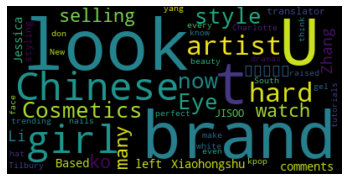

In [118]:
#wordcloud without the search word (as obviously they would be the biggest) 
#@markdown #Word Cloud Generator.
#@markdown ---
#@markdown ####words to be shown:

import_csv = "" #@param {type:"string"}
if import_csv != "":
  df = pd.read_csv(import_csv)


tweets = ' '.join([tweet for tweet in df['Tweets']])

if import_csv == "" :
  lst =  search.split()
  for i in lst:
    tweets = re.sub(i,'', tweets, flags=re.IGNORECASE)

word_count = 20  #@param {type: "integer"}

wordcloud = WordCloud(max_words=50).generate(tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-1.0, 1.0)

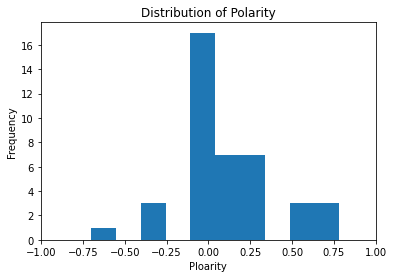

In [119]:
#histogram using matplotlib

#@markdown #Histogram of polarity
plt.title('Distribution of Polarity')
plt.hist(df['Polarity'])
plt.xlabel("Ploarity")
plt.ylabel("Frequency")
plt.xlim((-1, 1))

In [120]:
#Pie chart using plotly showing the distribution
#@markdown #Pie chart of polarity
fig = px.pie(df, names='PolarityCategory', color = 'PolarityCategory', title='Sentiment distribution on twitter', )
fig.show()

In [ ]:
!pip install PySimpleGUI
!pip install textblob
!pip install tweepy
!pip install wordcloud
!pip install pandas
!pip install matplotlib
!pip install plotly